# Lindstedt Poincare Example - Rayleigh's Equation

For the Lindstedt-Poincare method we introduce a dimensionless time $\tau$

$$
\begin{align*}
    \tau &= \omega t \\
    \dfrac{d}{dt} &= \omega \dfrac{d}{d\tau}\\
    \dfrac{d^2}{dt^2} &= \omega^2 \dfrac{^2}{d\tau^2}
\end{align*}
$$

We will use Rayleigh's Equation as an example

$$
\begin{gather*}
    \ddot{x} + \epsilon \left( \dfrac{1}{3}\dot{x}^3 - \dot{x} \right) + x = 0
\end{gather*}
$$

with initial conditions of 

$$
\begin{gather*}
    x(0) = a\\
    \dot{x}(0) = 0
\end{gather*}
$$

and the system will be investigated up to only the second order.

In [22]:
import sympy as sp
from sympy.simplify.fu import TR0, TR5, TR7, TR8, TR11
from math import factorial

In [2]:
N = 3  # first order

# Define the symbolic parameters
epsilon = sp.symbols('epsilon')
omega = sp.symbols('omega')
omega_i = sp.symbols('omega_(0:' + str(N) + ')')
tau = sp.symbols('tau')


x = sp.Function('x')(tau)
xdot = sp.Derivative(x, tau)
xddot = sp.Derivative(xdot, tau)

x0 = sp.Function('x_0')(tau)
x1 = sp.Function('x_1')(tau)
x2 = sp.Function('x_2')(tau)
x3 = sp.Function('x_3')(tau)

# EOM
EOM = omega**2 * xddot + x + epsilon * (omega**3 * xdot**3/3 - omega * xdot)
EOM

epsilon*(omega**3*Derivative(x(tau), tau)**3/3 - omega*Derivative(x(tau), tau)) + omega**2*Derivative(x(tau), (tau, 2)) + x(tau)

In [6]:
x_i = (x0, x1, x2, x3)
x_e = sum([epsilon**i * x_i[i] for i in range(N+1)])
x_e

epsilon**3*x_3(tau) + epsilon**2*x_2(tau) + epsilon*x_1(tau) + x_0(tau)

In [7]:
_omega = sum([epsilon**i * omega_i[i] for i in range(N)])
_omega

epsilon**2*omega_2 + epsilon*omega_1 + omega_0

In [8]:
# Substitute these into the EOM
EOM = EOM.subs([
    (x, x_e), (omega, _omega)
])
EOM

epsilon**3*x_3(tau) + epsilon**2*x_2(tau) + epsilon*((epsilon**2*omega_2 + epsilon*omega_1 + omega_0)**3*Derivative(epsilon**3*x_3(tau) + epsilon**2*x_2(tau) + epsilon*x_1(tau) + x_0(tau), tau)**3/3 - (epsilon**2*omega_2 + epsilon*omega_1 + omega_0)*Derivative(epsilon**3*x_3(tau) + epsilon**2*x_2(tau) + epsilon*x_1(tau) + x_0(tau), tau)) + epsilon*x_1(tau) + (epsilon**2*omega_2 + epsilon*omega_1 + omega_0)**2*Derivative(epsilon**3*x_3(tau) + epsilon**2*x_2(tau) + epsilon*x_1(tau) + x_0(tau), (tau, 2)) + x_0(tau)

In [9]:
EOM = sp.expand(EOM).doit()
EOM = sp.expand(EOM)
EOM

epsilon**16*omega_2**3*Derivative(x_3(tau), tau)**3/3 + epsilon**15*omega_1*omega_2**2*Derivative(x_3(tau), tau)**3 + epsilon**15*omega_2**3*Derivative(x_2(tau), tau)*Derivative(x_3(tau), tau)**2 + epsilon**14*omega_0*omega_2**2*Derivative(x_3(tau), tau)**3 + epsilon**14*omega_1**2*omega_2*Derivative(x_3(tau), tau)**3 + 3*epsilon**14*omega_1*omega_2**2*Derivative(x_2(tau), tau)*Derivative(x_3(tau), tau)**2 + epsilon**14*omega_2**3*Derivative(x_1(tau), tau)*Derivative(x_3(tau), tau)**2 + epsilon**14*omega_2**3*Derivative(x_2(tau), tau)**2*Derivative(x_3(tau), tau) + 2*epsilon**13*omega_0*omega_1*omega_2*Derivative(x_3(tau), tau)**3 + 3*epsilon**13*omega_0*omega_2**2*Derivative(x_2(tau), tau)*Derivative(x_3(tau), tau)**2 + epsilon**13*omega_1**3*Derivative(x_3(tau), tau)**3/3 + 3*epsilon**13*omega_1**2*omega_2*Derivative(x_2(tau), tau)*Derivative(x_3(tau), tau)**2 + 3*epsilon**13*omega_1*omega_2**2*Derivative(x_1(tau), tau)*Derivative(x_3(tau), tau)**2 + 3*epsilon**13*omega_1*omega_2**2*

In [11]:
# Collect the coefficients for the epsilons 
epsilon_Eq = sp.collect(EOM, epsilon, evaluate=False)
epsilon_0_Eq = sp.Eq(epsilon_Eq[epsilon**0], 0)
epsilon_0_Eq

Eq(omega_0**2*Derivative(x_0(tau), (tau, 2)) + x_0(tau), 0)

In [41]:
epsilon_1_Eq = sp.Eq(epsilon_Eq[epsilon], 0)
epsilon_1_Eq

Eq(omega_0**3*Derivative(x_0(tau), tau)**3/3 + omega_0**2*Derivative(x_1(tau), (tau, 2)) + 2*omega_0*omega_1*Derivative(x_0(tau), (tau, 2)) - omega_0*Derivative(x_0(tau), tau) + x_1(tau), 0)

In [55]:
epsilon_2_Eq = sp.Eq(epsilon_Eq[epsilon**2], 0)
epsilon_2_Eq

Eq(omega_0**3*Derivative(x_0(tau), tau)**2*Derivative(x_1(tau), tau) + omega_0**2*omega_1*Derivative(x_0(tau), tau)**3 + omega_0**2*Derivative(x_2(tau), (tau, 2)) + 2*omega_0*omega_1*Derivative(x_1(tau), (tau, 2)) + 2*omega_0*omega_2*Derivative(x_0(tau), (tau, 2)) - omega_0*Derivative(x_1(tau), tau) + omega_1**2*Derivative(x_0(tau), (tau, 2)) - omega_1*Derivative(x_0(tau), tau) + x_2(tau), 0)

In [14]:
epsilon_3_Eq = sp.Eq(epsilon_Eq[epsilon**3], 0)
epsilon_3_Eq

Eq(omega_0**3*Derivative(x_0(tau), tau)**2*Derivative(x_2(tau), tau) + omega_0**3*Derivative(x_0(tau), tau)*Derivative(x_1(tau), tau)**2 + 3*omega_0**2*omega_1*Derivative(x_0(tau), tau)**2*Derivative(x_1(tau), tau) + omega_0**2*omega_2*Derivative(x_0(tau), tau)**3 + omega_0**2*Derivative(x_3(tau), (tau, 2)) + omega_0*omega_1**2*Derivative(x_0(tau), tau)**3 + 2*omega_0*omega_1*Derivative(x_2(tau), (tau, 2)) + 2*omega_0*omega_2*Derivative(x_1(tau), (tau, 2)) - omega_0*Derivative(x_2(tau), tau) + omega_1**2*Derivative(x_1(tau), (tau, 2)) + 2*omega_1*omega_2*Derivative(x_0(tau), (tau, 2)) - omega_1*Derivative(x_1(tau), tau) - omega_2*Derivative(x_0(tau), tau) + x_3(tau), 0)

In [15]:
sp.dsolve(epsilon_0_Eq, x0) 

Eq(x_0(tau), C1*exp(-I*tau/omega_0) + C2*exp(I*tau/omega_0))

Not as convenient as working with the polar form

In [16]:
a = sp.symbols('a')
beta = sp.symbols('beta')
phi = tau + beta
x0_polar = a * sp.cos(tau + beta)
x0_polar

a*cos(beta + tau)

Update $\epsilon^1$ equation 

In [43]:
epsilon_1_Eq = sp.expand(epsilon_1_Eq.subs(x0, x0_polar)).doit()
epsilon_1_Eq = sp.expand(TR8(sp.expand(TR7(TR5((epsilon_1_Eq))))))
epsilon_1_Eq

Eq(-a**3*omega_0**3*sin(beta + tau)/4 + a**3*omega_0**3*sin(3*beta + 3*tau)/12 - 2*a*omega_0*omega_1*cos(beta + tau) + a*omega_0*sin(beta + tau) + omega_0**2*Derivative(x_1(tau), (tau, 2)) + x_1(tau), 0)

In the equation above we can see that the $\cos\phi$ terms are secular which causes the approximation fail due to resonance. Therefore, we must set those terms to go to zero.

$\omega_1$ = 0

$a = \pm \dfrac{2}{\omega_0}$

and let us pick $a = 2/\omega_0$

In [44]:
omega_1_new = 0

In [45]:
epsilon_1_Eq = epsilon_1_Eq.subs([(omega_i[1], omega_1_new), (a, 2/omega_i[0])])
epsilon_1_Eq = sp.simplify(epsilon_1_Eq)
epsilon_1_Eq

Eq(omega_0**2*Derivative(x_1(tau), (tau, 2)) + x_1(tau) + 2*sin(3*beta + 3*tau)/3, 0)

In [46]:
temp = sp.dsolve(epsilon_1_Eq)
temp

Eq(x_1(tau), C1*exp(-I*tau/omega_0) + C2*exp(I*tau/omega_0) + 2*sin(3*beta + 3*tau)/(3*(9*omega_0**2 - 1)))

We only care about the particular solution

In [47]:
x1_p = 2 * sp.sin(3 * beta + 3 * tau) / 3 / (9 * omega_i[0]**2 - 1)
x1_p

2*sin(3*beta + 3*tau)/(3*(9*omega_0**2 - 1))

In [56]:
epsilon_2_Eq = epsilon_2_Eq.subs([
    (omega_i[1], omega_1_new), (x0, x0_polar), (x1, x1_p)
]).doit()
epsilon_2_Eq = sp.expand(TR8(sp.expand(TR7(TR5((epsilon_2_Eq))))))
epsilon_2_Eq

Eq(-a**2*omega_0**3*cos(beta + tau)/(18*omega_0**2 - 2) - a**2*omega_0**3*cos(5*beta + 5*tau)/(18*omega_0**2 - 2) + a**2*omega_0**3*cos(3*beta + 3*tau)/(9*omega_0**2 - 1) - 2*a*omega_0*omega_2*cos(beta + tau) + omega_0**2*Derivative(x_2(tau), (tau, 2)) - 2*omega_0*cos(3*beta + 3*tau)/(9*omega_0**2 - 1) + x_2(tau), 0)

Remove the secular term by setting

$$
\omega_2 = -\dfrac{a\omega_0^2}{36\omega_0^2 - 4}
$$

In [57]:
omega_2_new = -a*omega_i[0]**2 / (36*omega_i[0]**2 - 4)

In [58]:
epsilon_2_Eq = epsilon_2_Eq.subs([(omega_i[2], omega_2_new), (a, 2/omega_i[0])])
epsilon_2_Eq = sp.simplify(epsilon_2_Eq)
epsilon_2_Eq

Eq((9*omega_0**4*Derivative(x_2(tau), (tau, 2)) + 9*omega_0**2*x_2(tau) - omega_0**2*Derivative(x_2(tau), (tau, 2)) + 2*omega_0*cos(3*beta + 3*tau) - 2*omega_0*cos(5*beta + 5*tau) - x_2(tau))/(9*omega_0**2 - 1), 0)

In [59]:
temp = sp.dsolve(epsilon_2_Eq)
temp

Eq(x_2(tau), C1*exp(-I*tau/omega_0) + C2*exp(I*tau/omega_0) - 2*omega_0*cos(5*beta + 5*tau)/(225*omega_0**4 - 34*omega_0**2 + 1) + 2*omega_0*cos(3*beta + 3*tau)/(81*omega_0**4 - 18*omega_0**2 + 1))

In [60]:
x2_p = (-2 * omega_i[0] * sp.cos(5*beta + 5*tau) / (225 * omega_i[0]**4 - 34*omega_i[0]**2 + 1) 
        + 2 *omega_i[0]*sp.cos(3*beta + 3*tau) / (81*omega_i[0]**4 - 18*omega_i[0]**2 + 1))
x2_p

-2*omega_0*cos(5*beta + 5*tau)/(225*omega_0**4 - 34*omega_0**2 + 1) + 2*omega_0*cos(3*beta + 3*tau)/(81*omega_0**4 - 18*omega_0**2 + 1)

In [104]:
omega = omega_i[0] + epsilon * omega_1_new + epsilon**2 *  omega_2_new
omega

-a*epsilon**2*omega_0**2/(36*omega_0**2 - 4) + omega_0

In [105]:
t = sp.symbols('t')
x_new = epsilon * a * sp.cos(omega * t + beta)
x_new

a*epsilon*cos(beta + t*(-a*epsilon**2*omega_0**2/(36*omega_0**2 - 4) + omega_0))

We can find $x_3(t)$ after this, but we do not have to. This is because we will "reconstitute" the solution to $O(\epsilon^3)$

$$
\begin{align*}
    \begin{cases}
        x &= x_0 + \epsilon x_1 + \epsilon^2 x_2 + O(\epsilon^3)\\
        \omega &= \omega_0 + \epsilon \omega_1 + \epsilon^2 \omega_2 + O(\epsilon^3)\\
        \tau &= \omega t 
    \end{cases}
\end{align*}
$$

Establish the expansion for $x$ (found during the Lindstedt-Poincare analysis)

In [109]:
x0_new = a * sp.cos(omega * t + beta) 
x1_new = x1_p.subs(tau, omega * t )
x2_new = x2_p.subs(tau, omega * t)
x_final = x0_new + epsilon * x1_new + epsilon ** 2 * x2_new

In [110]:
x_final

a*cos(beta + t*(-a*epsilon**2*omega_0**2/(36*omega_0**2 - 4) + omega_0)) + epsilon**2*(-2*omega_0*cos(5*beta + 5*t*(-a*epsilon**2*omega_0**2/(36*omega_0**2 - 4) + omega_0))/(225*omega_0**4 - 34*omega_0**2 + 1) + 2*omega_0*cos(3*beta + 3*t*(-a*epsilon**2*omega_0**2/(36*omega_0**2 - 4) + omega_0))/(81*omega_0**4 - 18*omega_0**2 + 1)) + 2*epsilon*sin(3*beta + 3*t*(-a*epsilon**2*omega_0**2/(36*omega_0**2 - 4) + omega_0))/(3*(9*omega_0**2 - 1))

In [112]:
# From the initial conditions we know that omega0 = 1, a = 2, and beta = 0
x_final = x_final.subs([
    (omega_i[0], 1), (a, 2), (beta, 0)])
x_final

epsilon**2*(cos(3*t*(1 - epsilon**2/16))/32 - cos(5*t*(1 - epsilon**2/16))/96) + epsilon*sin(3*t*(1 - epsilon**2/16))/12 + 2*cos(t*(1 - epsilon**2/16))

In [113]:
omega.subs([(a,2), (omega_i[0],1)])

1 - epsilon**2/16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, DOP853
from typing import List

In [2]:
# Generate phase plane of Rayleigh's equation to confirm limit cycle 

def rayleigh(t, x, e):
    return [x[1], -x[0] - e*(x[1]**3 / 3 - x[1])]

def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

def phasePlane(x1, x2, func, params):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y), *params.values())  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

def DEplot(sys: object, tspan: tuple, x0: List[List[float]], 
           x: np.ndarray, y: np.ndarray, params: dict):
    if len(tspan) != 3:
        raise Exception('tspan should be tuple of size 3: (min, max, number of points).')
    # Set up the figure the way we want it to look
    plt.figure(figsize=(12, 9))

    X1, X2, dx1, dx2, M = phasePlane(
        x, y, sys, params
    )

    # Quiver plot
    plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
    plt.grid()
    
    if tspan[0] < 0:
        t1 = np.linspace(0, tspan[0], tspan[2])
        t2 = np.linspace(0, tspan[1], tspan[2])
        if min(tspan) < 0:
            t_span1 = (np.max(t1), np.min(t1))
        else:
            t_span1 = (np.min(t1), np.max(t1))
        t_span2 = (np.min(t2), np.max(t2))
        for x0i in x0:
            sol1 = solve_diffeq(sys, t1, t_span1, x0i, params)
            plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
            sol2 = solve_diffeq(sys, t2, t_span2, x0i, params)
            plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')
    else:
        t = np.linspace(tspan[0], tspan[1], tspan[2])
        t_span = (np.min(t), np.max(t))
        for x0i in x0:
            sol = solve_diffeq(sys, t, t_span, x0i, params)
            plt.plot(sol.y[0, :], sol.y[1, :], '-r')
        

    plt.xlim([np.min(x), np.max(x)])
    plt.ylim([np.min(y), np.max(y)])
    plt.show()

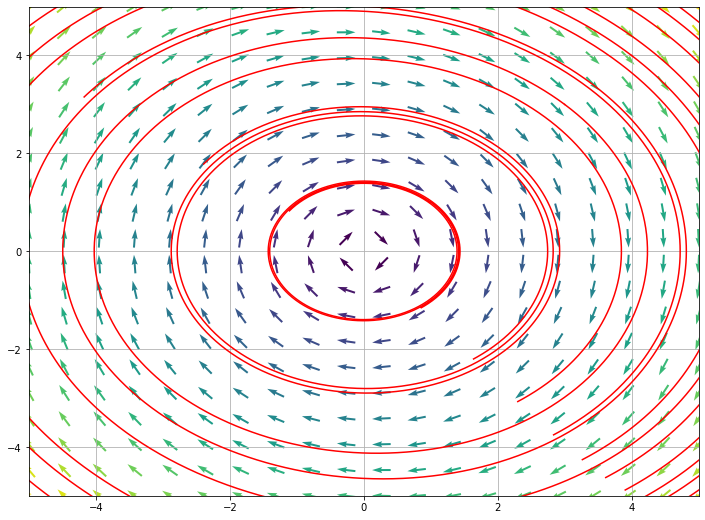

In [4]:
x10 = np.arange(0, 10, 1)
x20 = np.arange(0, 10, 1)
x0 = np.stack((x10, x20), axis=-1)

p = {'e': 0.01}

x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)

DEplot(rayleigh, (-8, 8, 1000), x0, x1, x2, p)

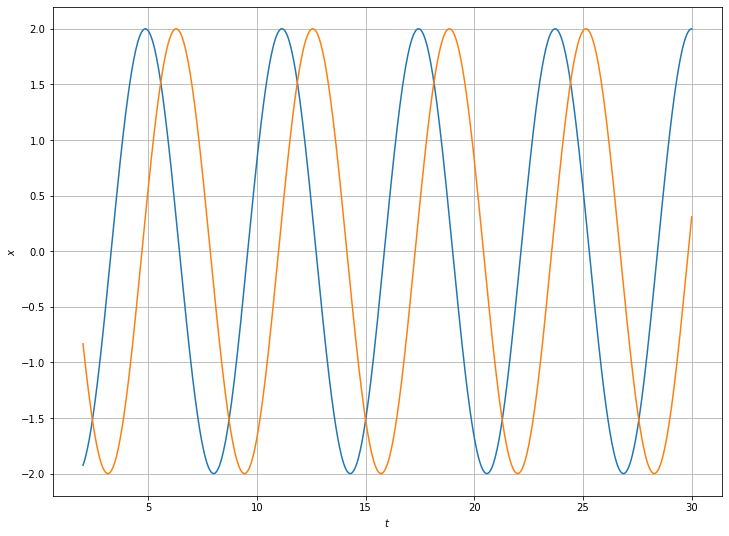

In [6]:
# Compare the approximation to the actual solution 
# let a = 2

tmax = 2
tmin = 30
tspan = np.linspace(tmin, tmax, 1000)
# ODE solver solution 
sol =  solve_diffeq(rayleigh, tspan, (tmin, tmax), [2, 0], p)

# Approximation 
def rayleigh_LP2(t, e):
    omega = 1 - e**2/16
    A = 2 * np.cos(t * omega)
    B = e * np.sin(3 * t * omega)/12
    C = e**2 * np.cos(3 * t * omega)/32
    D = -e**2 * np.cos(5 * t * omega) / 96
    return A + B + C + D

approx = rayleigh_LP2(tspan, 0.01)

plt.figure(figsize=(12, 9))
plt.plot(tspan, sol.y[0, :])
plt.plot(tspan, approx)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

### Better than first order Multiple Scale method